# Matplotlib tutorial 

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Matplotlib plots on figures and figures have one or more axes on which the points are specified .

<Figure size 432x288 with 0 Axes>

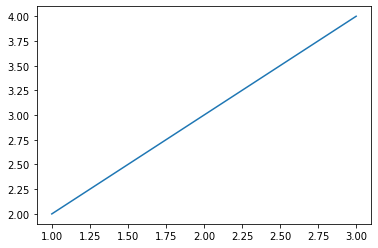

In [3]:
fig = plt.figure()
fig,ax = plt.subplots()
ax.plot([1,2,3],[2,3,4])

##  Basic terms

<b>Figure</b>: It is the whole space over which different plots are plotted, it contains one or more axes.

<b> Axes </b>: It is the region that we define as plot containing the axis,legends,data,labels,etc.
with the Axes we can control different aspects of the plot.

<b> Axis </b>: It is the number lines or refernce line that is used to plot the graph. Axis is used to modify ticks , limit the axis values and give tick labels.

<b> Artists </b>: It comprises of everthing that can be seen after rendering, this includes figures,axes,axis,etc.
As the the plot is rendered different artists are drawn on the space defined.

Two ways graph can be plotted:

        1)One is Objected oriented method of creating fig and axes manually .
        
        2)The other is using pyplot which does the fig and axes creation for us.

Text(0.5, 1.0, 'graph to show $x$ $x^2$ and $x^3$ ')

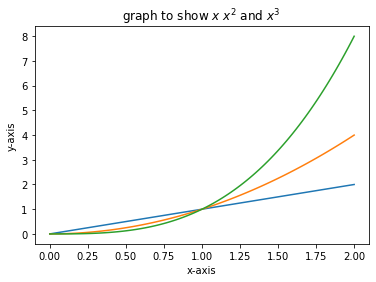

In [4]:
x = np.linspace(0,2,100)
plt.plot(x, x, label="linear")
plt.plot(x, x**2,label="quadratic")
plt.plot(x, x**3, label="cubic")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("graph to show $x$ $x^2$ and $x^3$ ")

### Subplots :

In [5]:
plt.subplot?

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
AxesSubplot(0.125,0.125;0.227941x0.755)


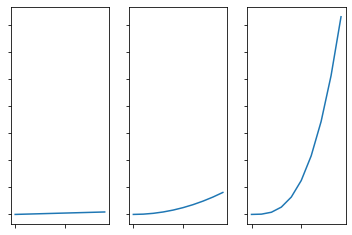

In [26]:
x = list(np.arange(10))
print(x)
y = [i**2 for i in x]
z = [i**3 for i in x]
ax1 = plt.subplot(131)
print(ax1)
ax1.plot(x,x)
ax2 = plt.subplot(132,sharey=ax1,)
ax2.plot(x,y)
ax3 = plt.subplot(133,sharey=ax1)
ax3.plot(x,z)
# removes tick labels 
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_visible(False)
ax3

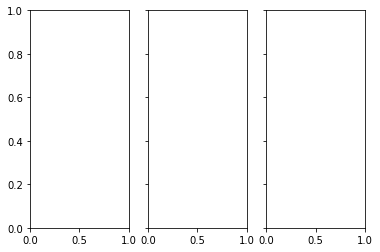

In [6]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
axs = [ax1, ax2, ax3]
    

### Histograms and distributions

(array([  2.,   5.,  28., 123., 206., 257., 204., 119.,  43.,  13.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

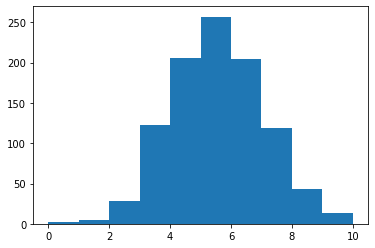

In [38]:
# flipping of a coin 10 times, tested 1000 times
binomial = np.random.binomial(10,.5,1000)
plt.figure()
plt.hist(binomial,bins=10)


(array([  6.,   2.,   6.,  19.,  28.,  39.,  68.,  90., 106., 116., 110.,
        119.,  97.,  73.,  52.,  35.,  18.,   9.,   6.,   1.]),
 array([-0.31243528, -0.28166538, -0.25089548, -0.22012558, -0.18935569,
        -0.15858579, -0.12781589, -0.097046  , -0.0662761 , -0.0355062 ,
        -0.0047363 ,  0.02603359,  0.05680349,  0.08757339,  0.11834329,
         0.14911318,  0.17988308,  0.21065298,  0.24142288,  0.27219277,
         0.30296267]),
 <a list of 20 Patch objects>)

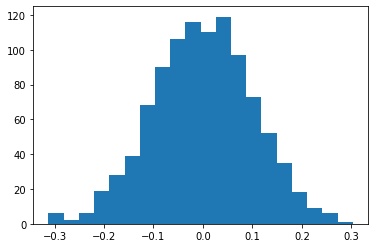

In [18]:
array = np.random.normal(loc=0,scale=0.1,size=1000)
plt.figure()
plt.hist(array,bins=20)

### Box plots

In [3]:
D1 = np.random.normal(loc=5,scale=9,size=1000)
D2 = np.random.normal(loc=4,scale=16,size=1000)
D3 = np.random.normal(loc=6,scale=20,size=1000)
D4 = np.random.normal(loc=3,scale=13,size=1000)
# outlier max = Q3 + IQR*1.5
df = pd.DataFrame({'D1' : D1,'D2':D2,'D3':D3,'D4':D4})
meta_df = df.describe()
meta_df = meta_df.transpose()
meta_df.head()

,count,mean,std,min,25%,50%,75%,max
D1,1000.0,5.584816,8.674081,-24.582793,-0.150810,6.059148,11.270347,32.573195
D2,1000.0,4.492102,15.716860,-42.035529,-5.715431,4.874050,14.630015,54.052073
D3,1000.0,6.279350,19.739173,-51.158977,-6.689775,5.802451,20.180497,66.311536
D4,1000.0,2.881909,12.611635,-35.422616,-5.229669,2.777346,11.454415,42.692406


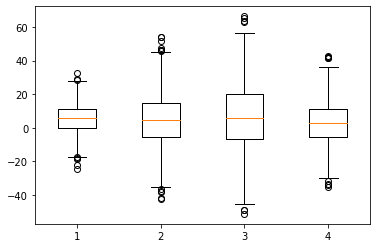

'\nVarious techniques can be applied on the boxplot graph.\n'

In [5]:
plt.figure()
plt.boxplot([D1,D2,D3,D4])
plt.show()
"""
Various techniques can be applied on the boxplot graph.
"""

### Interactive plots

In [71]:
data1 = np.random.normal(loc=5, scale=9, size=1000)
data2 = np.random.normal(loc=4, scale=25, size=1000)
df = pd.DataFrame([data1,data2], index =["1992", "1993"])
meta_df = df.transpose().describe()
meta_df = meta_df.transpose()
meta_df

,count,mean,std,min,25%,50%,75%,max
1992,1000.0,4.558086,9.374918,-25.013272,-2.166645,4.536982,10.652471,35.206629
1993,1000.0,3.820980,25.155316,-77.662168,-12.604459,3.991026,20.030956,88.011162


<IPython.core.display.Javascript object>


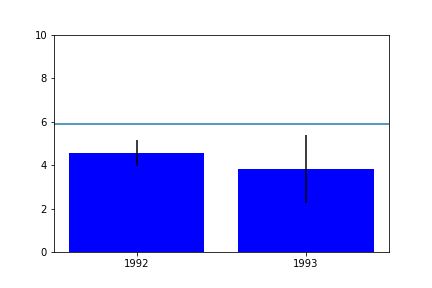

(0.0, 10.0)

In [73]:
"""
Getting yerr for the data:
    yerr = (std/sqrt(n))*C
    C ~= 1.96 for normal distribution
"""
%matplotlib notebook
condition = True
meta_df['yerr'] = (meta_df['std']/np.sqrt(1000))*1.96
meta_df['max_err'] = meta_df['mean'] + meta_df['yerr']
meta_df['min_err'] = meta_df['mean'] - meta_df['yerr']

yaxis = 5.9
fig, ax = plt.subplots()
bars = ax.bar(meta_df.index, meta_df['mean'],yerr=meta_df['yerr'], picker=True)
for i, bar in enumerate(bars):
    if meta_df.iloc[i]['max_err'] < yaxis:
        bar.set_facecolor("blue")
    elif meta_df.iloc[i]["max_err"] >= yaxis and meta_df.iloc[i]["min_err"] <= yaxis:
        bar.set_facecolor("white")
    else:
        bar.set_facecolor("red")
ax.axhline(yaxis)

ax.set_ylim(0,10,2)